# TG directly

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import pertpy as pt
import scanpy as sc
import anndata as ad

In [27]:
import pickle as pkl
with open("tumor_pre_DLG_normalizeTrue_bssolver_071023.pkl", "rb") as file:
    dlg_results = pkl.load(file)

In [28]:
adata = ad.read_h5ad("tumor_pre_DLG_normalizeTrue_bssolver_071023.h5ad")

In [ ]:
adata.obs.rename(columns={"Number of counts": "n_counts"}, inplace=True)
adata.obs['n_counts'] = adata.obs['n_counts'].str.replace(',', '').str.strip().astype(float)

In [ ]:
dl = pt.tl.Dialogue(sample_id = "Sample",
                       celltype_key = "Cluster",
                       n_counts_key = "n_counts",
                       n_mpcs = 10)

In [12]:
test_results = dl.test_association(adata, condition_label="Efficacy", conditions_compare = ("PR","SD"))

In [14]:
test_results["pvals_adj"]

,mcp_0,mcp_1,mcp_2,mcp_3,mcp_4,mcp_5,mcp_6,mcp_7,mcp_8,mcp_9
t_Bmem-CD27,0.133935,0.996494,0.840276,0.835061,0.021844,0.735016,0.744986,0.321793,0.057626,0.964654
t_CD4_Tcm-LMNA,0.133935,0.990698,0.576729,0.835061,0.021844,0.726261,0.744986,0.279277,0.063592,0.964654
t_CD4_Treg-FOXP3,0.133935,0.990698,0.840276,0.835061,0.031923,0.873899,0.764904,0.279277,0.511023,0.964654
t_CD8_MAIT-KLRB1,0.133935,0.990698,0.576729,0.835061,0.021844,0.726261,0.894425,0.279277,0.428104,0.964654
t_CD8_Tem-GZMK,0.133935,0.990698,0.576729,0.835061,0.031923,0.802207,0.914792,0.279277,0.145698,0.964654
t_CD8_Trm-ZNF683,0.133935,0.996494,0.576729,0.835061,0.031923,0.726261,0.744986,0.279277,0.078418,0.964654
t_Tn-LEF1,0.133935,0.990698,0.576729,0.835061,0.021844,0.726261,0.744986,0.321793,0.078792,0.964654
t_mono-FCN1,0.133935,0.990698,0.576729,0.835061,0.079806,0.802207,0.744986,0.279277,0.229512,0.964654
t_pB-IGHG1,0.133935,0.990698,0.990550,0.835061,0.021844,0.726261,0.744986,0.279277,0.078418,0.964654


In [16]:
mini = adata[adata.obs["Cluster"].isin(test_results['pvals'][test_results['pvals_adj']['mcp_4']==test_results['pvals_adj']['mcp_4'].min()].index.values)].copy()

In [17]:
mini.obs = mini.obs.replace({"SD":"Stable disease", "PR":"Partial response"})
mini.obs = mini.obs.replace({"t_CD4_Tcm-LMNA":"CD4 Tcm cells", "t_pB-IGHG1":"Plasma B cells", "t_Bmem-CD27":"Memory B cells",
                            "t_CD8_MAIT-KLRB1" : "CD8 MAIT cells", "t_Tn-LEF1":"Naive T cells" })

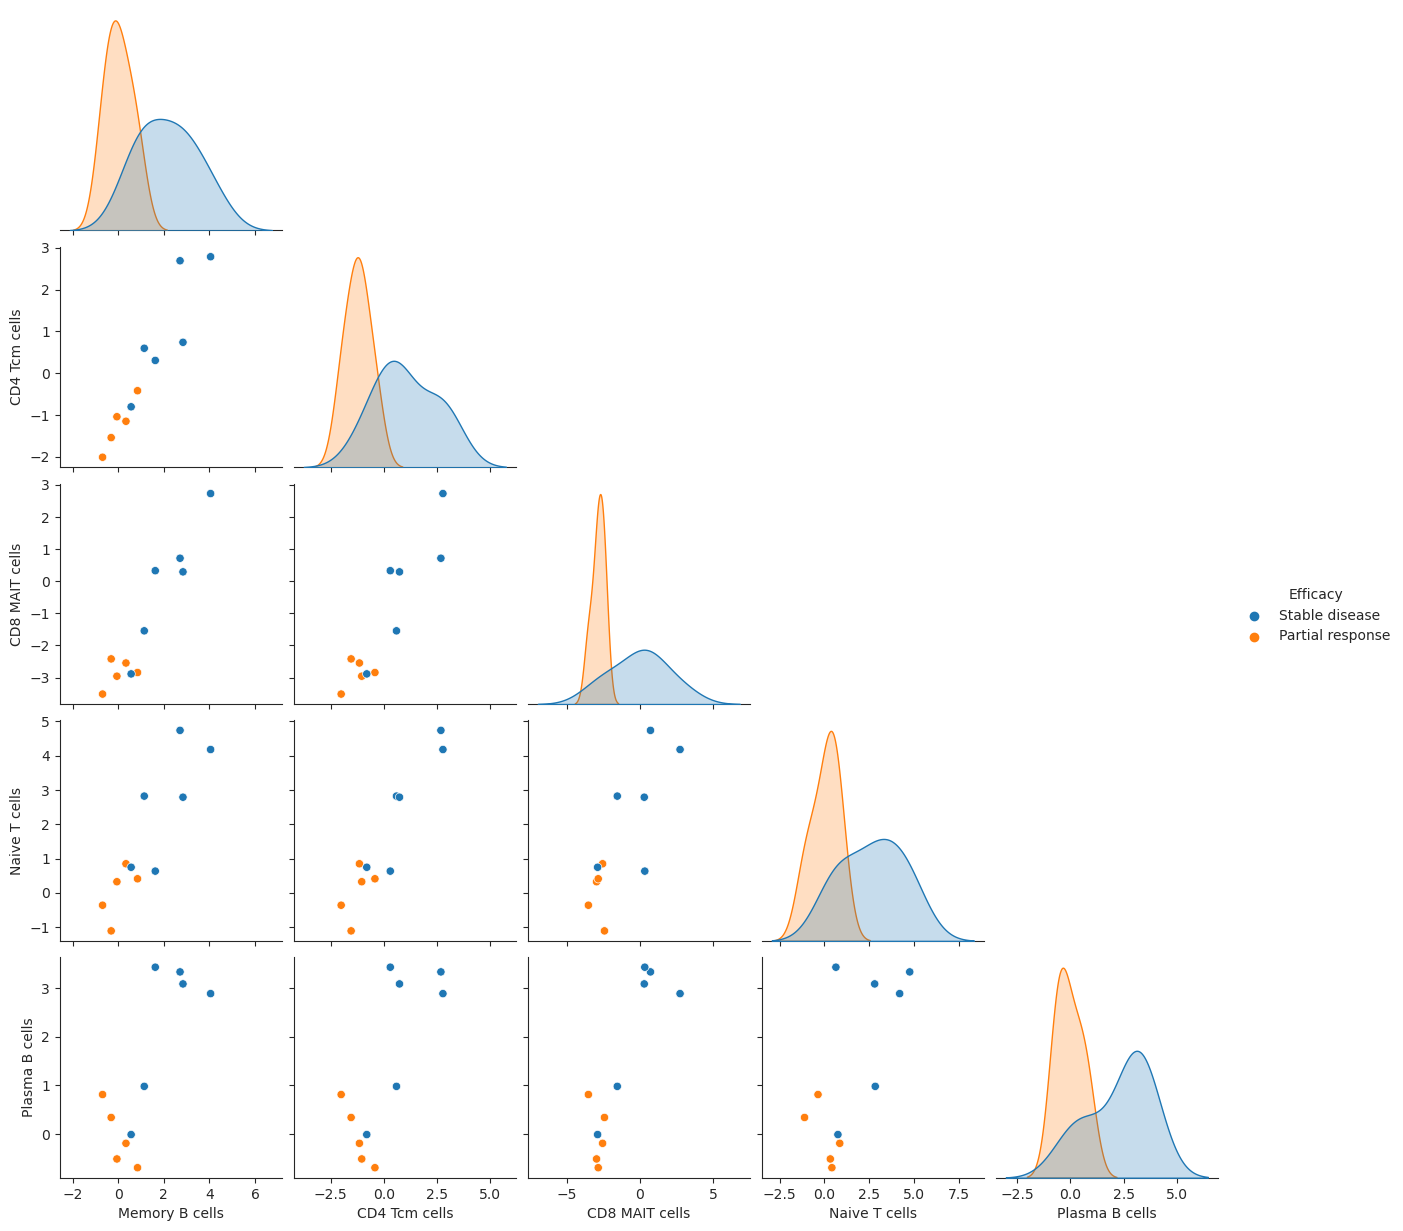

In [30]:
dl.plot_pairplot(
    mini,
    celltype_key="Cluster",
    color="Efficacy",
    mcp="mcp_4",
    sample_id="Sample"
)